In [12]:
# data manipulation
import numpy as np
import pandas as pd
from collections import Counter
pd.set_option('display.max_columns', None)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
plt.style.use('fivethirtyeight')

# modeling
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/less_close_label/2018_yelp_business_with_2020_label(cleaned).csv')
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open2020
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1.0
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1.0
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1.0
4,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,PA,15231,40.496177,-80.246011,4.0,35,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Sandwiches, Salad, Restaurants, Burgers, Comfo...",NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29673,Wyc49dq1r5uMqBl9bHVPAw,Church's Chicken,4800 E Flamingo Rd,Las Vegas,NV,89121,36.115214,-115.069188,2.5,24,"{'RestaurantsDelivery': 'False', 'NoiseLevel':...","Fast Food, Chicken Shop, Breakfast & Brunch, C...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:...",1.0
29674,5xX1Eb4fBoUr53OJkgRHRQ,Sofia's Pizza,"5645 S Eastern Ave, Ste 1",Las Vegas,NV,89136,36.087212,-115.119135,2.0,121,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Fast Food, Pizza, Delis","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1.0
29675,RckeGBEPQpGv00ivf6tcgw,Cozy Corner Cafe,"5901 E McKellips Rd, Ste 102",Mesa,AZ,85215,33.450360,-111.704131,4.5,195,"{'Alcohol': ""u'none'"", 'RestaurantsTakeOut': '...","Cafes, Breakfast & Brunch, Diners, Restaurants","{'Monday': '6:0-14:0', 'Tuesday': '6:0-14:0', ...",1.0
29676,AE80fzfVnsyeHiiVhwSGMw,Deluxburger Express,3588-3964 E Sky Harbor Blvd,Phoenix,AZ,85034,33.437361,-112.001836,2.5,93,"{'WiFi': ""u'free'"", 'Alcohol': ""'none'"", 'Busi...","Restaurants, Burgers",NaN,1.0


# Some Simple Visualization

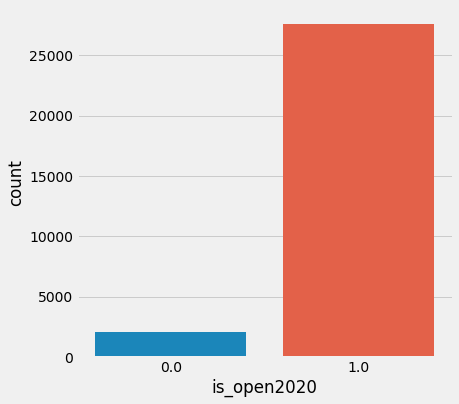

In [4]:
plt.figure(figsize=(6,6))
sns.countplot(x='is_open2020',data=df);

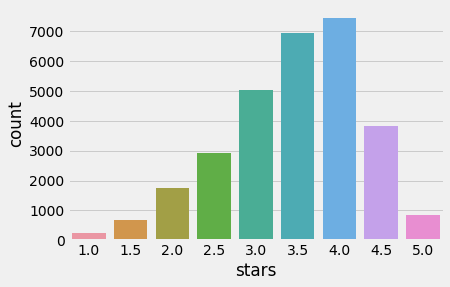

In [5]:
sns.countplot(x='stars',data=df)

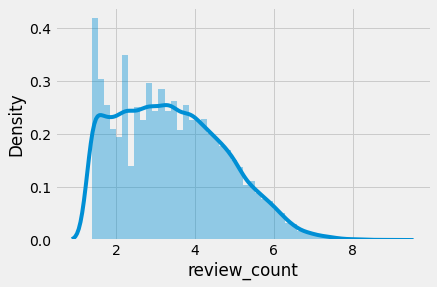

In [ ]:
sns.distplot(df['review_count'].apply(np.log1p))

(-0.5, 1199.5, 999.5, -0.5)

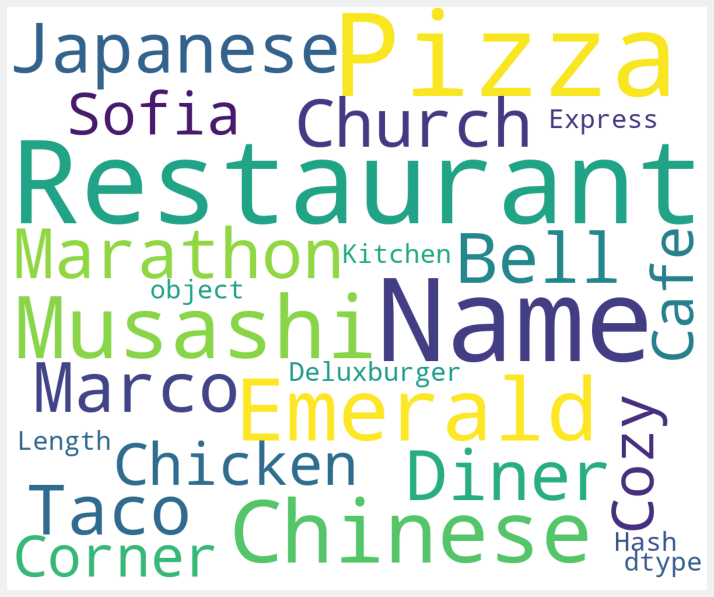

In [ ]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white', width=1200, stopwords = STOPWORDS, height=1000).generate(str(df['name']))
plt.imshow(wordcloud)
plt.axis('off')

# Baseline Modeling

cols1 is a list of our explanatory variables we want to use in our models. The dependent variable we are trying to predict is whether a business is open in 2020.

In [6]:
cols1 = ['latitude','longitude','stars','review_count']

In [7]:
X = df[cols1]
y = df['is_open2020']
X.fillna(0.0,inplace=True)

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
df_minmax_scaled = pd.DataFrame(X_minmax)
df_minmax_scaled

,0,1,2,3
0,0.574723,0.842212,0.375,0.014979
1,0.103834,0.813821,0.750,0.020012
2,0.015477,0.080559,0.500,0.001797
3,0.469792,0.802049,0.750,0.001558
4,0.402732,0.828245,0.750,0.003835
...,...,...,...,...
29673,0.160402,0.009028,0.375,0.002516
29674,0.158853,0.007853,0.250,0.014140
29675,0.012997,0.088191,0.875,0.023008
29676,0.012278,0.081188,0.375,0.010785


In [25]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 50)

In [35]:
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print(counter_train)
print(counter_test)

Counter({1.0: 19285, 0.0: 1489})
Counter({1.0: 8330, 0.0: 574})


Class imbalance arises due to the fact that model is trained predominantly on the label of majority class and very little on the minority class.

One of the negative effects of class imbalance is that - Since the proportion of majority class in our dataset is 93%, the model will predict everything to be of the majority class and we will end up with an accuracy of 93%. But it doesnt really mean anything and useless.

One way to get around this is to use SMOTE. SMOTE stands for - Synthetic Minority Over-sampling Technique.

In [27]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train_X, train_y)

In [23]:
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

In [36]:
counter_smote= Counter(y_res)
print(counter_smote)

Counter({1.0: 19285, 0.0: 19285})


In [29]:
L = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
accuracy = {}
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(X_res,y_res)
    pred_y = LR.predict(test_X)
    
    accuracy[i] = 100*accuracy_score(test_y,pred_y)

In [30]:
accuracy

{1e-07: 26.549865229110516,
 1e-06: 39.386792452830186,
 1e-05: 56.547619047619044,
 0.0001: 56.424079065588494,
 0.001: 53.31311769991015,
 0.01: 51.729559748427675,
 0.1: 51.606019766397125,
 1: 51.5947888589398}

Text(0, 0.5, 'Accuracy')

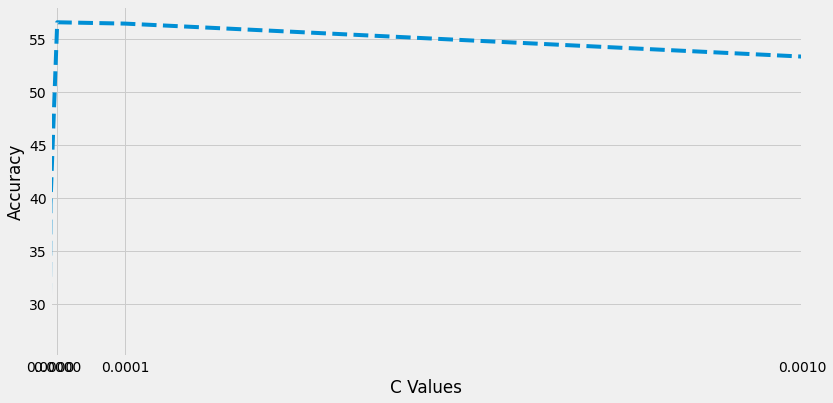

In [31]:
plt.figure(figsize=(12,6))
plt.plot( list(accuracy.keys()), list(accuracy.values()), '--')
plt.xticks(list(accuracy.keys()))
plt.xlim(0.000001,0.001)
plt.xlabel("C Values")
plt.ylabel("Accuracy")

In [32]:
LR = LogisticRegression(C=0.0001)
LR.fit(X_res,y_res)
pred_y = LR.predict(test_X)

In [33]:
confusion_matrix(test_y,pred_y)

array([[ 256,  318],
       [3562, 4768]])

In [34]:
accuracy_score(test_y,pred_y)

0.564240790655885